In [14]:
# importing pandas
import pandas as pd

In [15]:
# reading and inserting dataset
dataset = pd.read_csv("bestSellingMobiles.csv")

In [16]:
dataset.head()

,Rank,Manufacturer,Model,Form Factor,Smartphone?,Year,Units Sold (million )
0,1,Nokia,1100,Bar,False,2003,250.0
1,2,Nokia,1110,Bar,False,2005,247.5
2,3,Apple,iPhone 6 & 6 Plus,Touchscreen,True,2014,222.4
3,4,Nokia,105 Series,Bar,False,2013,200.0
4,5,Apple,iPhone 6S & 6S Plus,Touchscreen,True,2015,174.1


In [17]:
# filtering for the past 4 years (2020-2023)
recent_smartphones = dataset[(dataset['Smartphone?'] == True) & (dataset['Year'] >= 2020) & (dataset['Year'] <= 2024)]

# Sort the filtered data
sorted_recent_smartphones = recent_smartphones.sort_values(by='Units Sold (million )', ascending=False)

# Display the sorted dataset
print(sorted_recent_smartphones)


     Rank Manufacturer                                       Model  \
20     21        Apple     iPhone 12, 12 mini ,12 Pro & 12 Pro Max   
52     53        Apple                           iPhone 12 Pro Max   
53     54      Samsung  Galaxy S20, Galaxy S20+ & Galaxy S20 Ultra   
57     58        Apple                  iPhone SE (2nd generation)   
64     65      Samsung                                 Galaxy A21s   
70     71      Samsung                                  Galaxy A11   
79     80       Xiaomi                             Redmi Note9 Pro   
80     81      Samsung  Galaxy S21, Galaxy S21+ & Galaxy S21 Ultra   
84     85      Samsung                            Galaxy S22 Ultra   
95     96      Samsung                               Galaxy S20 FE   
106   107      Samsung                    Samsung Galaxy S24 Ultra   
108   109      Samsung                       Samsung Galaxy 414 4G   
110   111      Samsung                       Samsung Galaxy S23 FE   
115   116      Samsu

In [18]:
# Group the data by Manufacturer and sum the Units Sold
brand_sales = sorted_recent_smartphones.groupby('Manufacturer')['Units Sold (million )'].sum().reset_index()

# Sort the brands by total units sold in descending order
top_selling_brands = brand_sales.sort_values(by='Units Sold (million )', ascending=False)

# Display the top-selling brands
print(top_selling_brands)


  Manufacturer  Units Sold (million )
0        Apple                  153.2
1      Samsung                  117.1
2       Xiaomi                   15.0


C:\Users\manas\AppData\Local\Temp\ipykernel_6636\192264699.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Units Sold (million )', y='Manufacturer', data=top_selling_brands, palette='viridis')


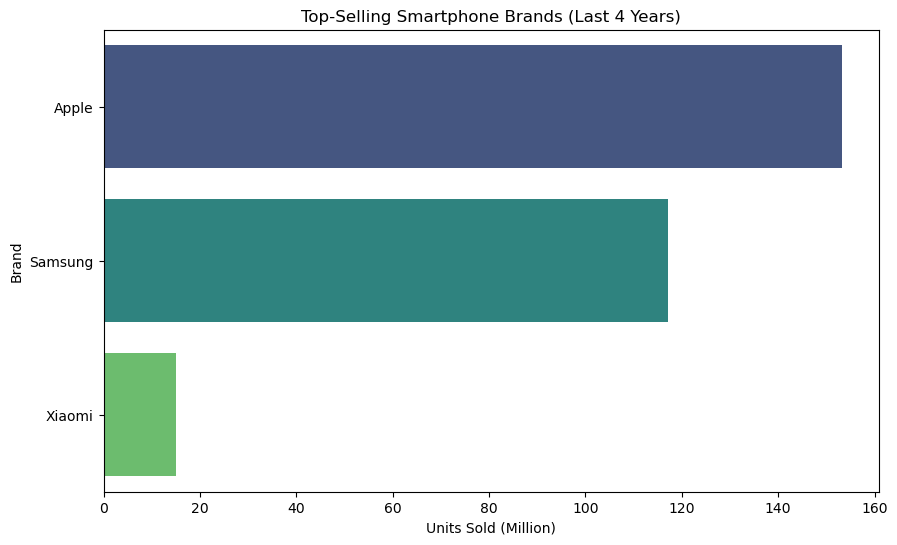

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming top_selling_brands is already calculated
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x='Units Sold (million )', y='Manufacturer', data=top_selling_brands, palette='viridis')

# Set the title and labels
plt.title('Top-Selling Smartphone Brands (Last 4 Years)')
plt.xlabel('Units Sold (Million)')
plt.ylabel('Brand')

# Show the plot
plt.show()


In [20]:
# Find the top-selling mobile model
top_selling_model = sorted_recent_smartphones.sort_values(by='Units Sold (million )', ascending=False).head(1)

# Extract the model name, manufacturer, units sold, and the year it was sold
model_name = top_selling_model['Model'].values[0]
manufacturer = top_selling_model['Manufacturer'].values[0]
units_sold = top_selling_model['Units Sold (million )'].values[0]
year_sold = top_selling_model['Year'].values[0]

# Display the results
print(f"Top-Selling Mobile Model: {model_name} by {manufacturer}")
print(f"Units Sold: {units_sold} million")
print(f"Year: {year_sold}")

Top-Selling Mobile Model: iPhone 12, 12 mini ,12 Pro & 12 Pro Max by Apple
Units Sold: 100.0 million
Year: 2020


In [21]:
# Group by Manufacturer and Model, then sum the Units Sold
model_sales = sorted_recent_smartphones.groupby(['Manufacturer', 'Model'])['Units Sold (million )'].sum().reset_index()

# Sort the models within each manufacturer to find the top model for each
top_models = model_sales.sort_values(['Manufacturer', 'Units Sold (million )'], ascending=[True, False]).groupby('Manufacturer').head(1)

# Display the top model for each manufacturer
print(top_models)


   Manufacturer                                       Model  \
1         Apple     iPhone 12, 12 mini ,12 Pro & 12 Pro Max   
6       Samsung  Galaxy S20, Galaxy S20+ & Galaxy S20 Ultra   
15       Xiaomi                             Redmi Note9 Pro   

    Units Sold (million )  
1                   100.0  
6                    28.0  
15                   15.0  


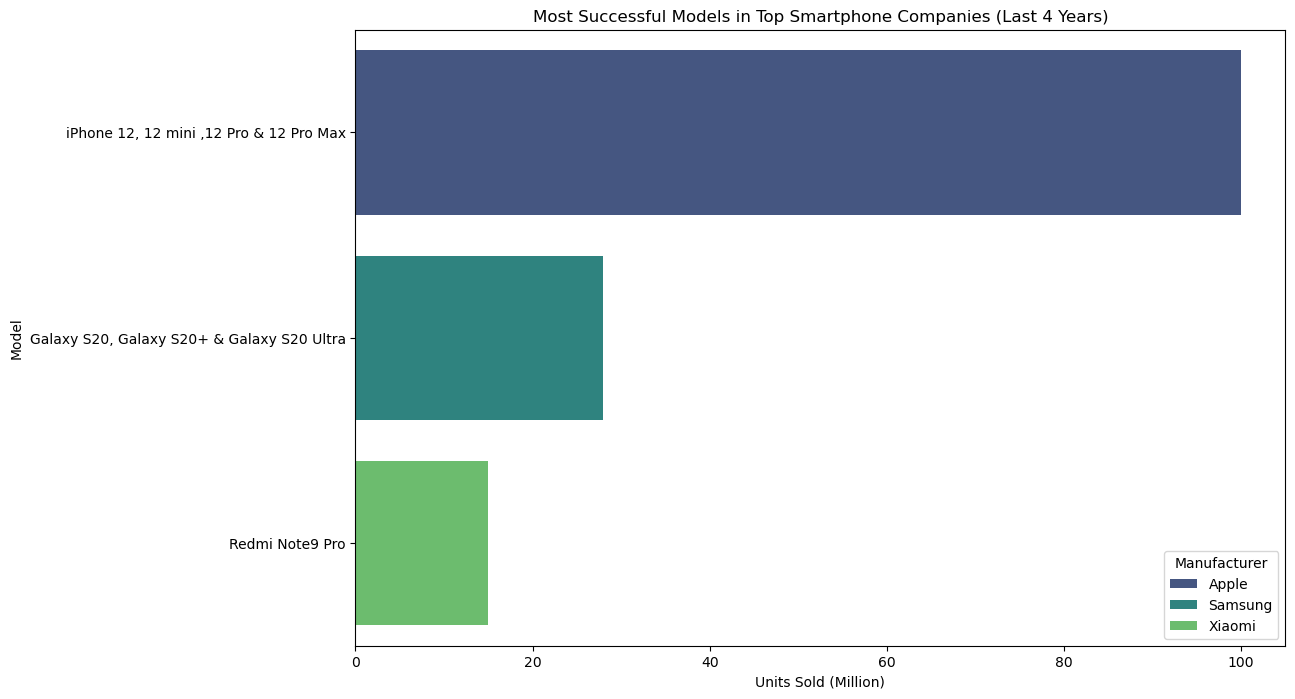

In [22]:
plt.figure(figsize=(12, 8))

# Create a bar plot
sns.barplot(x='Units Sold (million )', y='Model', hue='Manufacturer', data=top_models, palette='viridis')

# Set the title and labels
plt.title('Most Successful Models in Top Smartphone Companies (Last 4 Years)')
plt.xlabel('Units Sold (Million)')
plt.ylabel('Model')

# Show the plot
plt.show()


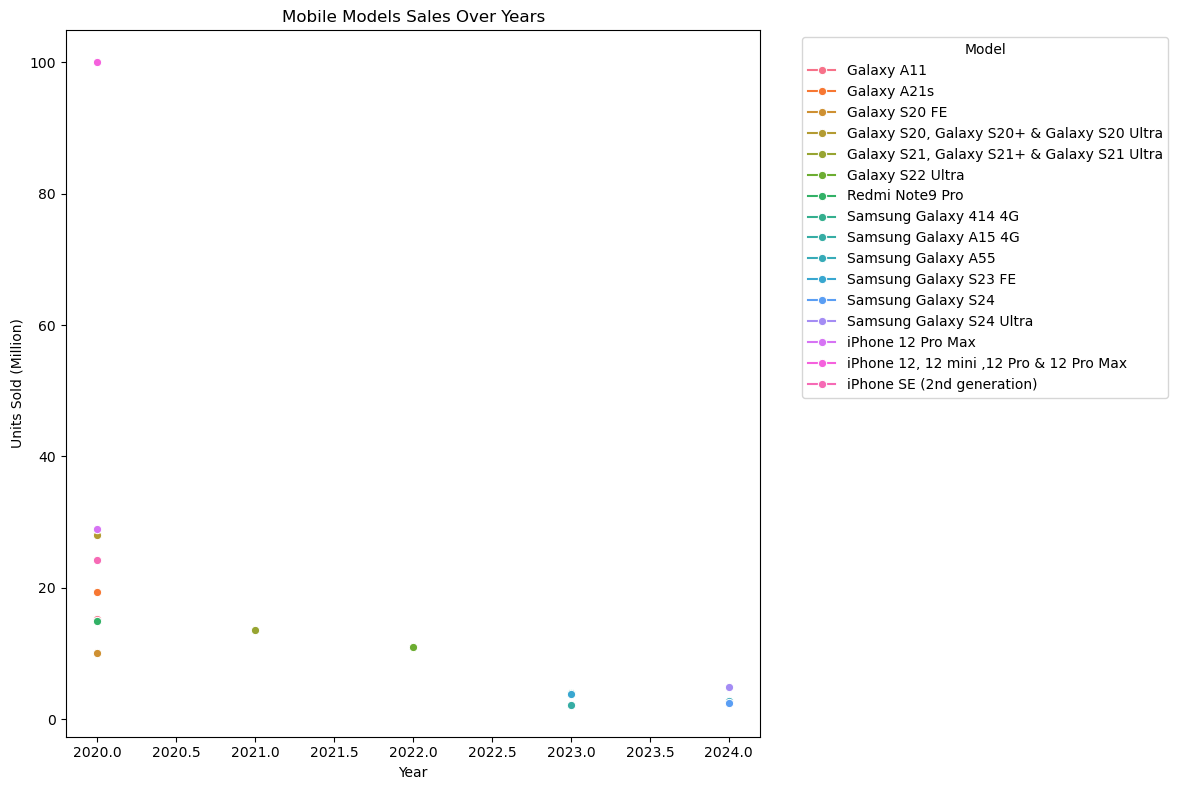

In [23]:
# Group the data by Manufacturer, Model, and Year, then sum the Units Sold
model_year_sales = sorted_recent_smartphones.groupby(['Model', 'Year'])['Units Sold (million )'].sum().reset_index()

plt.figure(figsize=(12, 8))

# Create a line plot
sns.lineplot(data=model_year_sales, x='Year', y='Units Sold (million )', hue='Model', marker='o')

# Set the title and labels
plt.title('Mobile Models Sales Over Years')
plt.xlabel('Year')
plt.ylabel('Units Sold (Million)')

# Show the plot
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust the layout to make room for the legend
plt.show()


In [24]:
# Group by Year and Manufacturer, then sum the Units Sold
brand_year_sales = sorted_recent_smartphones.groupby(['Year', 'Manufacturer'])['Units Sold (million )'].sum().reset_index()


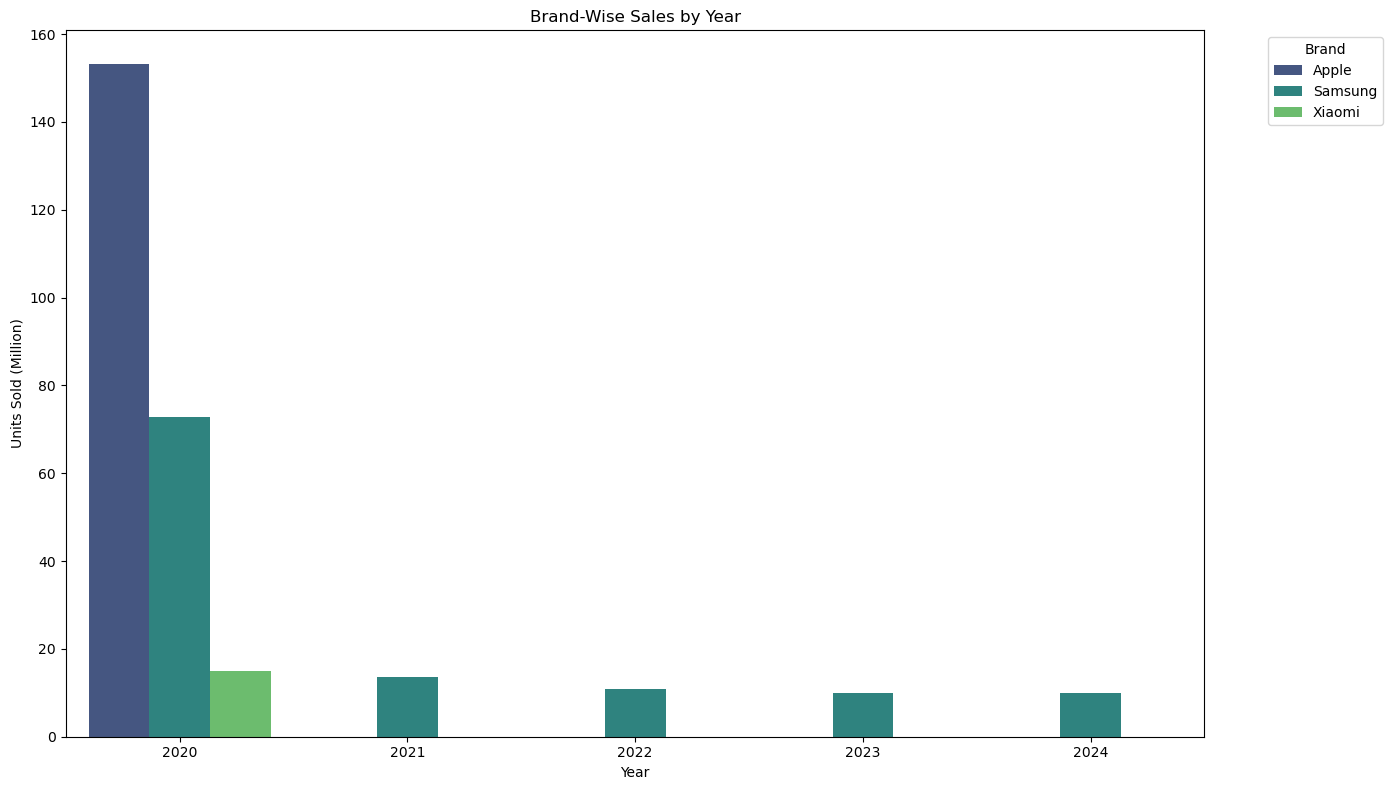

In [25]:
plt.figure(figsize=(14, 8))

# Create a bar plot
sns.barplot(data=brand_year_sales, x='Year', y='Units Sold (million )', hue='Manufacturer', palette='viridis')

# Set the title and labels
plt.title('Brand-Wise Sales by Year')
plt.xlabel('Year')
plt.ylabel('Units Sold (Million)')

# Show the plot
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust the layout to make room for the legend
plt.show()
